THE SPARKS FOUNDATION

Data Science and Business Analytics Internship(GRIP May2021)

TASK 1:PREDICTION USING SUPERVISED ML

Problem: Predict the percentage of marks of the students based on the number of study hours.

By:NAVYA SUSAN THOMAS

IMPORT THE REQUIRED LIBRARIES

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

READING THE DATA

In [10]:
data = pd.read_csv('https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv')
data.head(5)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


CHECK IF THERE IS ANY NULL VALUE IN THE DATASET

In [11]:
data.isnull == True

False

There is no null value in the Dataset so we can now visualize our Data.

VISUALIZE THE DATA

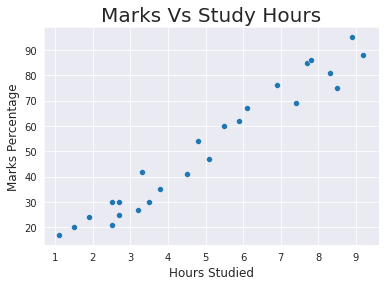

In [12]:
sns.set_style('darkgrid')
sns.scatterplot(y= data['Scores'], x= data['Hours'])
plt.title('Marks Vs Study Hours',size=20)
plt.ylabel('Marks Percentage', size=12)
plt.xlabel('Hours Studied', size=12)
plt.show()

From the above scatter plot there seems to be correlation between the 'Marks Percentage' and 'Hours Studied'. Lets plot a regression line to confirm the correlation.

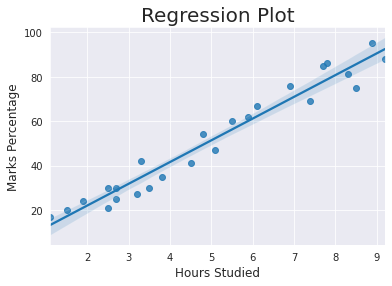

           Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000


In [13]:
sns.regplot(x= data['Hours'], y= data['Scores'])
plt.title('Regression Plot',size=20)
plt.ylabel('Marks Percentage', size=12)
plt.xlabel('Hours Studied', size=12)
plt.show()
print(data.corr())

It is confirmed that the variables are positively correlated.

TRAINING THE MODEL

1)SPLITTING THE DATA

In [14]:
X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values

train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 0)

2)FITTING THE DATA INTO THE MODEL

In [15]:
regression = LinearRegression()
regression.fit(train_X, train_y)
print("---------Model Trained---------")

---------Model Trained---------


PREDICTING THE PERCENTAGE OF MARKS

In [17]:
pred_y = regression.predict(val_X)
prediction = pd.DataFrame({'Hours': [i[0] for i in val_X], 'Predicted Marks': [k for k in pred_y]})
prediction

,Hours,Predicted Marks
0,1.5,16.844722
1,3.2,33.745575
2,7.4,75.500624
3,2.5,26.786400
4,5.9,60.588106
5,3.8,39.710582
6,1.9,20.821393


COMPARING THE PREDICTED MARKS WITH THE ACTUAL MARKS

In [18]:
compare_scores = pd.DataFrame({'Actual Marks': val_y, 'Predicted Marks': pred_y})
compare_scores

,Actual Marks,Predicted Marks
0,20,16.844722
1,27,33.745575
2,69,75.500624
3,30,26.786400
4,62,60.588106
5,35,39.710582
6,24,20.821393


VISUALLY COMPARING THE PREDICTED MARKS WITH THE ACTUAL MARKS

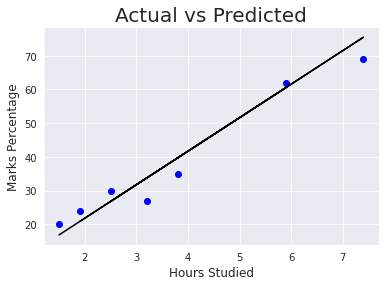

In [19]:
plt.scatter(x=val_X, y=val_y, color='blue')
plt.plot(val_X, pred_y, color='Black')
plt.title('Actual vs Predicted', size=20)
plt.ylabel('Marks Percentage', size=12)
plt.xlabel('Hours Studied', size=12)
plt.show()


EVALUATING THE MODEL

In [20]:
print('Mean absolute error: ',mean_absolute_error(val_y,pred_y))

Mean absolute error:  4.130879918502482


Small value of Mean absolute error states that the chances of error or wrong forecasting through the model are very less.

WHAT WILL BE THE PREDICTED SCORE OF A STUDENT IF HE/SHE STUDIES FOR 9.25 HRS/DAY?

In [21]:
hours = [9.25]
answer = regression.predict([hours])
print("Score = {}".format(round(answer[0],3)))

Score = 93.893


According to the regression model if a student studies for 9.25 hours a day, he/she is likely to score 93.89 marks.

THANK YOU !